In [75]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Section 1</h1>

In [2]:
class Node:
    # def __init__(self):
    #     self.is_leaf = True
    def split(self, attribute, threshold):
        self.is_leaf = False
        self.attribute = attribute
        self.threshold = threshold
        self.left_child = Node()
        self.right_child = Node()
    def make_leaf(self, instances):
        self.is_leaf = True
        count_zero = np.sum(instances == 0)
        count_one = instances.size - count_zero
        if count_one >= count_zero:
            self.label = 1
        else:
            self.label = 0



In [3]:
def entropy(probs):
    log2 = np.log2(probs, out=np.zeros_like(probs), where=(probs!=0.0))           
    return - np.dot(probs, log2)

def info_gain(s1, s2):
    s1_count_zero  = np.sum(s1 == 0.0)
    s1_count_one = s1.size - s1_count_zero
    s2_count_zero  = np.sum(s2 == 0.0)
    s2_count_one = s2.size - s2_count_zero
    total_sum = s1.size + s2.size

    entr = entropy(np.array([(s1_count_zero + s2_count_zero)/total_sum, (s1_count_one + s2_count_one)/total_sum]))

    cond_s1 = entropy(np.array([s1_count_zero/s1.size, s1_count_one/s1.size]))
    cond_s2 = entropy(np.array([s2_count_zero/s2.size, s2_count_one/s2.size]))
    cond_entr = (cond_s1 * s1.size + cond_s2 * s2.size)/total_sum

    return entr - cond_entr

In [4]:
def build_tree(node, data):
    chosen_split = (None, 0.0)                      # format is: ((j,c), max_gain_ratio)
    for j in range(2):
        for c in np.unique(data[:,j]):
            mask = data[:,j]>=c
            s1 = data[mask,2]
            s2 = data[~mask,2]

            p1 = s1.size/(s1.size + s2.size)
            p2 = s2.size/(s1.size + s2.size)
            split_entropy = entropy(np.array([p1, p2]))
            if split_entropy == 0.0:
                continue
            gain_ratio = info_gain(s1, s2)/split_entropy
            if gain_ratio > chosen_split[1]:
                chosen_split = ((j,c), gain_ratio)
    if chosen_split[1] == 0.0:
        node.make_leaf(data[:,2])
    else:
        attribute, threshold = chosen_split[0]
        node.split(attribute, threshold)
        mask = data[:,attribute] >= threshold
        build_tree(node.left_child, data[mask, :])
        build_tree(node.right_child, data[~mask, :])
        


In [5]:
def predict_using_tree(node, input):
    if node.is_leaf:
        return np.full(input.shape[0], node.label)
    else:
        mask = input[:, node.attribute] >= node.threshold
        out_left = predict_using_tree(node.left_child, input[mask])
        out_right = predict_using_tree(node.right_child, input[~mask])
        out = np.empty(input.shape[0], out_left.dtype)
        out[mask] = out_left
        out[~mask] = out_right
        return out


In [6]:
def count_nodes(node):
    if node.is_leaf:
        return 1
    else:
        return 1 + count_nodes(node.left_child) + count_nodes(node.right_child)

<h1>Section 2</h1>

<h4>Question 2</h4>

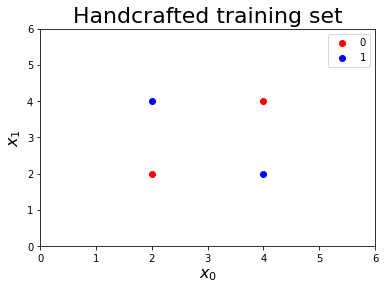

In [97]:
fig, ax = plt.subplots()
x = np.array([2, 4])
y = np.array([2, 4])
ax.scatter(x, y, c='r', label='0')
x = np.array([4, 2])
y = np.array([2, 4])
ax.scatter(x, y, c='b', label='1')
ax.legend()
plt.title('Handcrafted training set', fontsize=22)
plt.xlabel(r'$x_0$', fontsize = 16)
plt.ylabel(r'$x_1$', fontsize = 16)
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.show()

<h4>Question 3</h4>

In [4]:
data = np.loadtxt('Druns.txt')

In [5]:
data

array([[ 0.1, -2. ,  0. ],
       [ 0. , -1. ,  1. ],
       [ 0. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  2. ,  0. ],
       [ 0. ,  3. ,  0. ],
       [ 0. ,  4. ,  0. ],
       [ 0. ,  5. ,  0. ],
       [ 0. ,  6. ,  1. ],
       [ 0. ,  7. ,  0. ],
       [ 0. ,  8. ,  1. ]])

In [24]:
for j in range(2):
    for c in np.unique(data[:,j]):
        mask = data[:,j]>=c
        s1 = data[mask,2]
        s2 = data[~mask,2]

        p1 = s1.size/(s1.size + s2.size)
        p2 = s2.size/(s1.size + s2.size)
        split_entropy = entropy(np.array([p1, p2]))
        
        if split_entropy == 0.0:
            print((j, c), "             Info gain =", 0.0)
        else:
            gain_ratio = info_gain(s1, s2)/split_entropy
            print((j, c), "             Gain ratio =", gain_ratio)

(0, 0.0)              Info gain = 0.0
(0, 0.1)              Gain ratio = 0.10051807676021828
(1, -2.0)              Info gain = 0.0
(1, -1.0)              Gain ratio = 0.10051807676021828
(1, 0.0)              Gain ratio = 0.055953759631263845
(1, 1.0)              Gain ratio = 0.005780042205152189
(1, 2.0)              Gain ratio = 0.001144349517276632
(1, 3.0)              Gain ratio = 0.016411136842102134
(1, 4.0)              Gain ratio = 0.049749064181778435
(1, 5.0)              Gain ratio = 0.11124029586339801
(1, 6.0)              Gain ratio = 0.23609960614360798
(1, 7.0)              Gain ratio = 0.055953759631263845
(1, 8.0)              Gain ratio = 0.4301569161309807


<h4>Question 4</h4>

In [31]:
from PrettyPrint import PrettyPrintTree
from colorama import Back

In [8]:
data = np.loadtxt('D3leaves.txt')

In [9]:
tree = Node()        #root
build_tree(tree, data)

In [66]:
pt = PrettyPrintTree(
    lambda x: [x.left_child, x.right_child] if x.is_leaf == False else [],    
    lambda x: f"x_{x.attribute} >= {x.threshold}" if x.is_leaf == False else f"y = {int(x.label)}",
    color=Back.LIGHTWHITE_EX
)

In [67]:
pt(tree)

     x_0 >= 10.0 
   ┌──────┴─────┐
 y = 1     x_1 >= 3.0 
           ┌───┴───┐
         y = 1   y = 0 


<h4>Question 5</h4>

In [68]:
data_d1 = np.loadtxt('D1.txt')

In [69]:
tree_d1 = Node()        #root
build_tree(tree_d1, data_d1)

In [70]:
pt(tree_d1)

 x_1 >= 0.201829 
   ┌───┴───┐
 y = 1   y = 0 


Very simple to interpret. Just a horizontal decision boundary at $x_1 = 0.201829$

In [71]:
data_d2 = np.loadtxt('D2.txt')

In [72]:
tree_d2 = Node()        #root
build_tree(tree_d2, data_d2)

In [73]:
pt(tree_d2)

                                                                                                          x_0 >= 0.533076 
                                                       ┌─────────────────────────────────────────────────────────┴─────────────────────────────────────────────────────────┐
                                                x_1 >= 0.228007                                                                                                     x_1 >= 0.88635 
                ┌──────────────────────────────────────┴─────────────────────────────────────┐                                           ┌────────────────────────────────┴────────────────────────────────┐
         x_1 >= 0.424906                                                              x_0 >= 0.887224                             x_0 >= 0.041245                                                   x_1 >= 0.691474 
   ┌────────────┴────────────┐                                                ┌──────────────┴────────────

Virtally impossible to interpret by a human. 

<h4>Question 6</h4>

Note: Help taken from this online tutorial on plotting decision boundaries: https://psrivasin.medium.com/plotting-decision-boundaries-using-numpy-and-matplotlib-f5613d8acd19

In [54]:
x_min, x_max = data_d1[:, 0].min() - 0.1, data_d1[:,0].max() + 0.1
y_min, y_max = data_d1[:, 1].min() - 0.1, data_d1[:, 1].max() + 0.1

In [55]:
xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100), np.linspace(y_min, y_max, 100))

In [56]:
x_input = np.column_stack((xx.flatten(), yy.flatten()))
y_pred = predict_using_tree(tree_d1, x_input)


In [57]:
y_pred = y_pred.reshape(xx.shape)

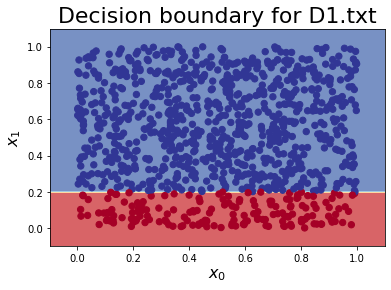

In [58]:
plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )
plt.scatter(data_d1[:,0], data_d1[:, 1], c=data_d1[:, 2], s=40, cmap=plt.cm.RdYlBu)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Decision boundary for D1.txt', fontsize=22)
plt.xlabel(r'$x_0$', fontsize = 16)
plt.ylabel(r'$x_1$', fontsize = 16)
plt.show()

In [31]:
x_min, x_max = data_d2[:, 0].min() - 0.1, data_d2[:,0].max() + 0.1
y_min, y_max = data_d2[:, 1].min() - 0.1, data_d2[:, 1].max() + 0.1

In [32]:
xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100), np.linspace(y_min, y_max, 100))

In [33]:
x_input = np.column_stack((xx.flatten(), yy.flatten()))
y_pred = predict_using_tree(tree_d2, x_input)


In [34]:
y_pred = y_pred.reshape(xx.shape)

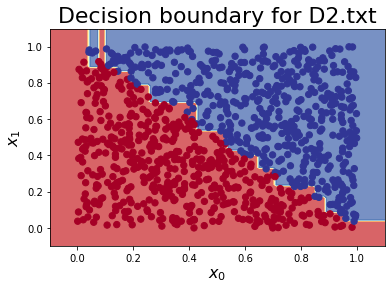

In [53]:
plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )
plt.scatter(data_d2[:,0], data_d2[:, 1], c=data_d2[:, 2], s=40, cmap=plt.cm.RdYlBu)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Decision boundary for D2.txt', fontsize=22)
plt.xlabel(r'$x_0$', fontsize = 16)
plt.ylabel(r'$x_1$', fontsize = 16)
plt.show()

The hypothesis space for decision trees is axis-aligned splits stitched together to make the decision boundary. The D1 dataset allows a simple horizontal split, but the D2 dataset requires a diagonal decision boundary (weakness of decision trees) by stitching together axis-aligned cuts. That's why the second tree has much greater size.

<h4>Question 7</h4>

In [7]:
data_big =  np.loadtxt('Dbig.txt')

In [8]:
rng = np.random.default_rng()
data_big = rng.permutation(data_big)

In [9]:
D_32 = data_big[0:32]
D_128 = data_big[0:128]
D_512 = data_big[0:512]
D_2048 = data_big[0:2048]
D_8192 = data_big[0:8192]
test_set = data_big[8192:]

In [10]:
test_error = np.empty(5)

In [11]:
tree_D_32 = Node()        #root
build_tree(tree_D_32, D_32)

In [12]:
pred_D_32 = predict_using_tree(tree_D_32, test_set[:,0:2])
test_error[0] = 1 - np.mean(pred_D_32 == test_set[:, 2])

In [13]:
tree_D_128 = Node()        #root
build_tree(tree_D_128, D_128)

In [14]:
pred_D_128 = predict_using_tree(tree_D_128, test_set[:,0:2])
test_error[1] = 1 - np.mean(pred_D_128 == test_set[:, 2])

In [15]:
tree_D_512 = Node()        #root
build_tree(tree_D_512, D_512)
pred_D_512 = predict_using_tree(tree_D_512, test_set[:,0:2])
test_error[2] = 1 - np.mean(pred_D_512 == test_set[:, 2])

In [16]:
tree_D_2048 = Node()        #root
build_tree(tree_D_2048, D_2048)
pred_D_2048 = predict_using_tree(tree_D_2048, test_set[:,0:2])
test_error[3] = 1 - np.mean(pred_D_2048 == test_set[:, 2])

In [17]:
tree_D_8192 = Node()        #root
build_tree(tree_D_8192, D_8192)
pred_D_8192 = predict_using_tree(tree_D_8192, test_set[:,0:2])
test_error[4] = 1 - np.mean(pred_D_8192 == test_set[:, 2])

In [18]:
num_nodes = np.empty(5, dtype=int)
num_nodes[0] = count_nodes(tree_D_32)
num_nodes[1] = count_nodes(tree_D_128)
num_nodes[2] = count_nodes(tree_D_512)
num_nodes[3] = count_nodes(tree_D_2048)
num_nodes[4] = count_nodes(tree_D_8192)
num_nodes

array([ 19,  25,  55, 137, 275])

In [19]:
for i,j in enumerate([32, 128, 512, 2048, 8192]):
    print(f'For D_{j}:              n (number of nodes) = {num_nodes[i]},              err_n = {test_error[i]}')

For D_32:              n (number of nodes) = 19,              err_n = 0.16980088495575218
For D_128:              n (number of nodes) = 25,              err_n = 0.09734513274336287
For D_512:              n (number of nodes) = 55,              err_n = 0.055862831858407125
For D_2048:              n (number of nodes) = 137,              err_n = 0.039269911504424826
For D_8192:              n (number of nodes) = 275,              err_n = 0.025995575221238965


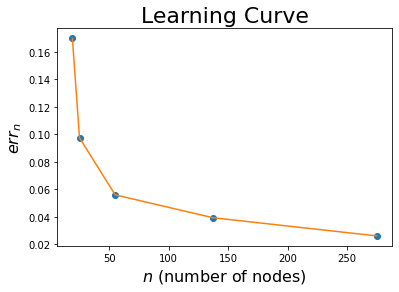

In [24]:
plt.plot(num_nodes, test_error, 'o')
plt.plot(num_nodes, test_error)
plt.title('Learning Curve', fontsize=22)
plt.xlabel(r'$n$ (number of nodes)', fontsize = 16)
plt.ylabel(r'$err_n$', fontsize = 16)
plt.show()

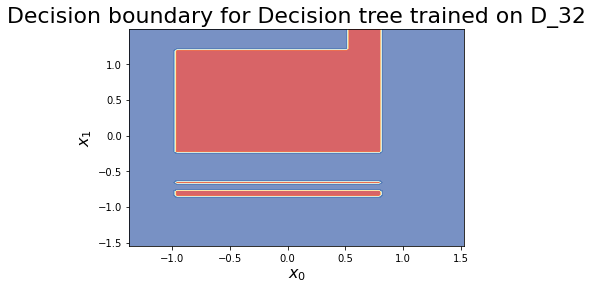

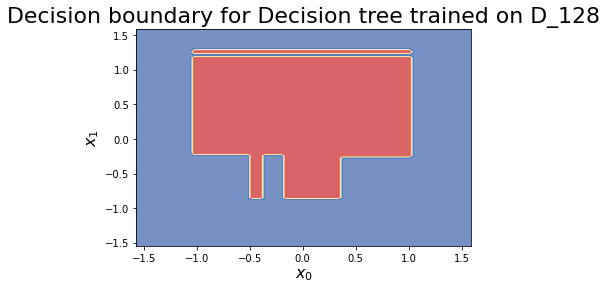

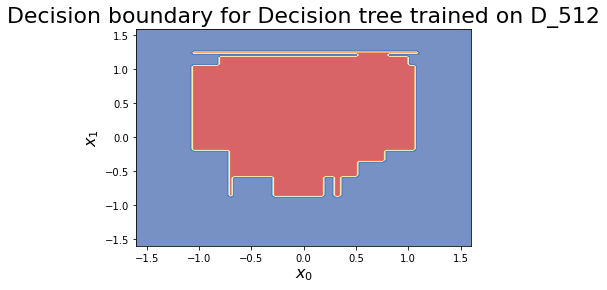

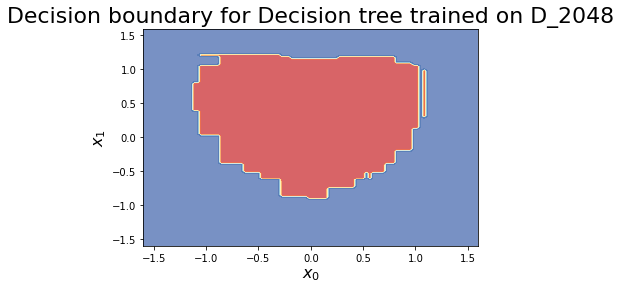

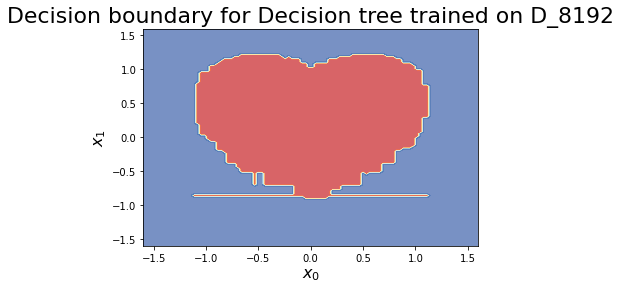

In [26]:
for (data, tree) in zip([D_32, D_128, D_512, D_2048, D_8192], [tree_D_32, tree_D_128, tree_D_512, tree_D_2048, tree_D_8192]):
    x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
    y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100), np.linspace(y_min, y_max, 100))
    x_input = np.column_stack((xx.flatten(), yy.flatten()))
    y_pred = predict_using_tree(tree, x_input)

    y_pred = y_pred.reshape(xx.shape)
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )
    # plt.scatter(data[:,0], data[:, 1], c=data[:, 2], s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'Decision boundary for Decision tree trained on D_{data.shape[0]}', fontsize=22)
    plt.xlabel(r'$x_0$', fontsize = 16)
    plt.ylabel(r'$x_1$', fontsize = 16)
    plt.show()

<h1>Section 3</h1>

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dt1 = DecisionTreeClassifier(random_state=0)
dt2 = DecisionTreeClassifier(random_state=0)
dt3 = DecisionTreeClassifier(random_state=0)
dt4 = DecisionTreeClassifier(random_state=0)
dt5 = DecisionTreeClassifier(random_state=0)

In [36]:
dt1.fit(D_32[:,0:2], D_32[:,2])
dt2.fit(D_128[:,0:2], D_128[:,2])
dt3.fit(D_512[:,0:2], D_512[:,2])
dt4.fit(D_2048[:,0:2], D_2048[:,2])
dt5.fit(D_8192[:,0:2], D_8192[:,2])

num_nodes = np.empty(5, dtype=int)
num_nodes[0] = dt1.tree_.node_count
num_nodes[1] = dt2.tree_.node_count
num_nodes[2] = dt3.tree_.node_count
num_nodes[3] = dt4.tree_.node_count
num_nodes[4] = dt5.tree_.node_count
num_nodes

array([ 19,  25,  65, 127, 231])

In [40]:
test_error = np.empty(5)
test_error[0] = 1 - dt1.score(test_set[:,0:2], test_set[:,2])
test_error[1] = 1 - dt2.score(test_set[:,0:2], test_set[:,2])
test_error[2] = 1 - dt3.score(test_set[:,0:2], test_set[:,2])
test_error[3] = 1 - dt4.score(test_set[:,0:2], test_set[:,2])
test_error[4] = 1 - dt5.score(test_set[:,0:2], test_set[:,2])

In [41]:
for i,j in enumerate([32, 128, 512, 2048, 8192]):
    print(f'For D_{j}:              n (number of nodes) = {num_nodes[i]},              err_n = {test_error[i]}')

For D_32:              n (number of nodes) = 19,              err_n = 0.20962389380530977
For D_128:              n (number of nodes) = 25,              err_n = 0.08075221238938057
For D_512:              n (number of nodes) = 65,              err_n = 0.04922566371681414
For D_2048:              n (number of nodes) = 127,              err_n = 0.033738938053097356
For D_8192:              n (number of nodes) = 231,              err_n = 0.01603982300884954


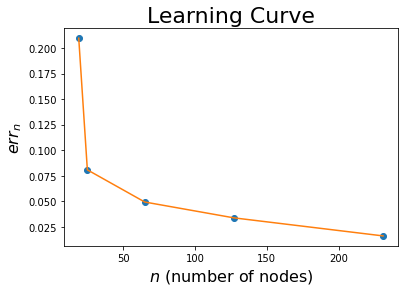

In [42]:
plt.plot(num_nodes, test_error, 'o')
plt.plot(num_nodes, test_error)
plt.title('Learning Curve', fontsize=22)
plt.xlabel(r'$n$ (number of nodes)', fontsize = 16)
plt.ylabel(r'$err_n$', fontsize = 16)
plt.show()

<h1>Section 4</h1>

In [43]:
from scipy.interpolate import lagrange

In [158]:
a = 0
b = 100
n = 100

In [159]:
rng = np.random.default_rng()

In [160]:
x = rng.uniform(a,b,n)
y = np.sin(x)
f = lagrange(x, y)

In [161]:
x_test = rng.uniform(a,b,50)
y_test = np.sin(x_test)

In [162]:
train_error = np.log(np.mean((f(x) - y)**2))
test_error = np.log(np.mean((f(x_test) - y_test)**2))

In [163]:
print(f'For no noise added:       training error = {train_error:0,.3f}       test error = {test_error:0,.3f}')

For no noise added:       training error = 318.695       test error = 317.943


In [170]:
sd = np.geomspace(0.01, 25, num=5)
sd

array([1.00000000e-02, 7.07106781e-02, 5.00000000e-01, 3.53553391e+00,
       2.50000000e+01])

In [171]:
epsilon = np.empty((sd.size, n))
for i in range(sd.size):
    epsilon[i] = rng.normal(scale=sd[i], size=n)
epsilon.shape

(5, 100)

In [172]:
for i in range(sd.size):
    x_train = x + epsilon[i]
    y_train = np.sin(x_train)
    f_model = lagrange(x_train, y_train)
    train_error = np.log(np.mean((f_model(x_train) - y_train)**2))
    test_error = np.log(np.mean((f_model(x_test) - y_test)**2))
    print(f'For zero-mean Gaussian noise with std dev = {sd[i]:0,.3f} added:       training error = {train_error:0,.3f}       test error = {test_error:0,.3f}')

For zero-mean Gaussian noise with std dev = 0.010 added:       training error = 317.798       test error = 317.328
For zero-mean Gaussian noise with std dev = 0.071 added:       training error = 324.833       test error = 323.966
For zero-mean Gaussian noise with std dev = 0.500 added:       training error = 309.409       test error = 308.178
For zero-mean Gaussian noise with std dev = 3.536 added:       training error = 313.804       test error = 313.162
For zero-mean Gaussian noise with std dev = 25.000 added:       training error = 308.236       test error = 247.175


I think this question is not appropriate. SciPy's lagrange interpolation is not numerically stable for more than 20 nodes. That's why I can't really infer anything from the results. On the other hand, if we do the experiment for $n = 15$, as shown below, it gives zero train error and high test error. That's what we would intuitively expect as well, since lagrange interpolation basically is the prototypical example of overfitting (polynomial passes through each of the training points exactly).

In [243]:
n = 15
x = rng.uniform(a,b,n)
y = np.sin(x)
f = lagrange(x, y)
x_test = rng.uniform(a,b,n)
y_test = np.sin(x_test)
train_error = np.mean((f(x) - y)**2)
test_error = np.mean((f(x_test) - y_test)**2)
print(f'For no noise added:       training error = {train_error:0,.3f}       test error = {test_error:0,.3f}')

For no noise added:       training error = 0.000       test error = 626.341
